Doing some background reading, we have two articles that coincide somewhat with our research goals.

Firstly, there's an article by [Allen Downey](http://allendowney.blogspot.com/2015/08/the-inspection-paradox-is-everywhere.html) that discusses the inspection paradox as applied to many different data sets, including bus arrival times. The inspection paradox is an explanation for why most people can truthfully report that busses are overcrowded and late, despite the truthful observation of the bus operator that lateness or crowding are within reasonable limits. Say that the mean wait time between busses is 10 minutes. Also assume that if bus B is late, bus A cannot step in to serve those waiting customers even if it's closer. Then, If I'm to approach the bus stop at a uniformly random time, then the probability that I'll arrive at the bus stop within the waiting time interval of a late bus is greater than the probability arriving within the waiting time interval of the on-time bus. This is just because the waiting intervals for late busses are longer, so there's more of a chance of arriving then. Based on scenario described, the waiting time paradox also makes the claim, that when the average time between arrivals is $n$, customers experience an average wait interval experienced of $2n$.

Allen Downey demonstrates this by plotting the actual distribution of time between trains on the Red Line in Boston, and the biased distribution that would be observed by passengers of that line. His observations and a plot of that data are as follows:

> The average time between trains is 7.8 minutes, so we might expect the average wait time to be 3.8 minutes.  But the average of the biased distribution is 8.8 minutes, and the average wait time for passengers is 4.4 minutes, about 15% longer.
> 
> In this case the difference between the two distributions is not very big because the variance of the actual distribution is moderate.  When the actual distribution is long-tailed, the effect of the inspection paradox can be much bigger.

![image](https://lh5.googleusercontent.com/wXeSdkxHUickHH00uf0Bw1RbYTUa1fBRwzjpTBPN_wWd1SuKkTGqzZO9DiN9lxV2QiNPu4nXWHULM6dN-XAFsMKC6ciQIoeaHD-jd-NIM6uIBfRKcZxryM9c2e9WQ32kkktgHfA)

For our purposes, creating a biased distribution to test whether the MTA bus data can be described by the inspection paradox would require two things:
1. Bus arrival times: that is, we need the exact time a bus reaches a particular latitude and longitude.
2. Passenger Data: we need to know how many passengers boarded the bus whenever it stopped at the particular stop in question.

This biased distribution would help us guage probability from the customer standpoint. We're not pointing at busses as they leave the station, assessing the probability as to whether they'll be late. Instead, we're guaging the probability that a customer, who makes his/her way to a stop, will experience a delay.

Once we have this biased distribution, we can find the impact of conditional probabilities due to various weather events (taken from external data) on average user wait time (the biased chart.)

The [Kaggle Data Set](https://www.kaggle.com/stoney71/new-york-city-transport-statistics) Meets All these requirements (BTW)

# Todo
Our Ultimate goal is to build on what Downey has done in his analysis, only with the MTA bus times. We aim to find the distribution of time intervals between one bus leaving and the next bus coming (we call these "time deltas"). If these time intervals feature a great deal of variance, many passengers will experience the inspection paradox; i.e. if they approach a bus stop at a uniform, random time, even if the average (mean) bus arrives on time, most passengers will experience long wait times. We can later simulate the probability that a given passenger will experience a delay using montecarlo methods and/or add conditional probabilities to our analysis with weather data.

Finding a distribution of time deltas first requires:
1. Querying the MTA Bus data for one stop, on one bus line, in one direction on that line, over the course of one day. This is to first simplify the analysis which can then be generalized to all stops throughout the bus system.
2. For a given bus stop, find time deltas of all busses on one line. (caveat gps signals are intermittant-- `ArrivalProximityText` may or may not be "at stop" when needed. For example, a gps signal may come before or immediately after a stop, but not include a stop itself. If this is the case, we may need to use latitude and longitude instead and deal with busses that are in close proximity to a given set of lat, lon coordinates. We'll assume that gps signals are fast enough for this to not be a problem for now.
3. Create a histogram of bus time deltas.
3. Check the direction conventions using in the column `DirectionRef` in the data set by choosing two stops, one bus id and two times to find the "direction" of the stop. This will also help us ascertain the 24th hour convention in our data. After that, correct the 24th hour convention as needed.

In [ ]:
%%capture
import pandas as pd

mta = pd.read_csv('mta_1708.csv', error_bad_lines=False)
mta.head()

In [15]:
import numpy as np
from matplotlib import pyplot as plt

def ecdf(inputSeries):
    x = np.sort(inputSeries)
    y = np.arange(1, len(x)+1) / len(x)
    _ = plt.plot(x, y, marker='.', linestyle='none')
    _ = plt.xlabel('Time Delta (minutes)')
    _ = plt.ylabel('ECDF')
    plt.margins(0.02) # Keeps data off plot edges
    plt.show()

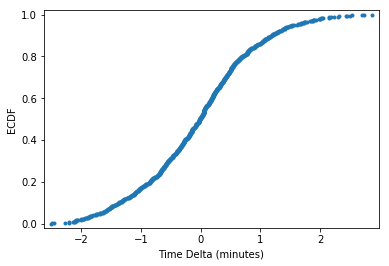

In [20]:
randomData = np.random.randn(800)
ecdf(randomData)